In [3]:
import pandas as pd 
import numpy as np
import warnings  
warnings.filterwarnings('ignore') 

In [4]:
df = pd.read_csv("logistics_dataset_with_maintenance_required.csv")
df

,Vehicle_ID,Make_and_Model,Year_of_Manufacture,Vehicle_Type,Usage_Hours,Route_Info,Load_Capacity,Actual_Load,Last_Maintenance_Date,Maintenance_Type,...,Brake_Condition,Failure_History,Anomalies_Detected,Predictive_Score,Maintenance_Required,Weather_Conditions,Road_Conditions,Delivery_Times,Downtime_Maintenance,Impact_on_Efficiency
0,1,Ford F-150,2022,Truck,530,Rural,7.534549,9.004247,2023-04-09,Oil Change,...,Good,1,0,0.171873,1,Clear,Highway,30.000000,0.093585,0.150063
1,2,Volvo FH,2015,Van,10679,Rural,7.671728,6.111785,2023-07-20,Tire Rotation,...,Fair,1,0,0.246670,1,Clear,Rural,30.000000,3.361201,0.343017
2,3,Chevy Silverado,2022,Van,4181,Rural,2.901159,3.006055,2023-03-17,Oil Change,...,Good,1,1,0.455236,1,Clear,Highway,48.627823,1.365300,0.100000
3,4,Chevy Silverado,2011,Truck,2974,Urban,15.893347,18.825290,2024-05-01,Tire Rotation,...,Good,0,1,0.060208,1,Clear,Highway,30.000000,0.000000,0.135749
4,5,Ford F-150,2014,Van,2539,Rural,60.668320,65.605463,2023-11-15,Tire Rotation,...,Good,1,1,0.264929,1,Rainy,Urban,300.000000,6.608704,0.395193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91995,91996,Chevy Silverado,2022,Van,293,Urban,12.446365,14.460276,2023-02-14,Oil Change,...,Fair,0,1,0.144945,1,Clear,Urban,226.165475,0.000000,0.100000
91996,91997,Ford F-150,2006,Truck,1445,Highway,82.281140,78.013688,2023-02-16,Tire Rotation,...,Good,0,0,0.304221,0,Clear,Highway,34.557859,0.000000,0.231941
91997,91998,Tesla Semi,2020,Van,831,Rural,27.510624,21.631656,2023-04-18,Engine Overhaul,...,Poor,0,1,0.155152,1,Clear,Urban,132.641694,0.000000,0.270712
91998,91999,Tesla Semi,2022,Truck,1326,Highway,4.439415,4.511761,2024-05-14,Tire Rotation,...,Poor,0,0,0.195718,1,Clear,Highway,108.944134,0.000000,0.100000


In [5]:
df.dtypes

Vehicle_ID                 int64
Make_and_Model            object
Year_of_Manufacture        int64
Vehicle_Type              object
Usage_Hours                int64
Route_Info                object
Load_Capacity            float64
Actual_Load              float64
Last_Maintenance_Date     object
Maintenance_Type          object
Maintenance_Cost         float64
Engine_Temperature       float64
Tire_Pressure            float64
Fuel_Consumption         float64
Battery_Status           float64
Vibration_Levels         float64
Oil_Quality              float64
Brake_Condition           object
Failure_History            int64
Anomalies_Detected         int64
Predictive_Score         float64
Maintenance_Required       int64
Weather_Conditions        object
Road_Conditions           object
Delivery_Times           float64
Downtime_Maintenance     float64
Impact_on_Efficiency     float64
dtype: object

In [6]:
df.drop(columns=['Vehicle_ID'], inplace=True)

ValueError: num must be an integer with 1 <= num <= 16, not 17

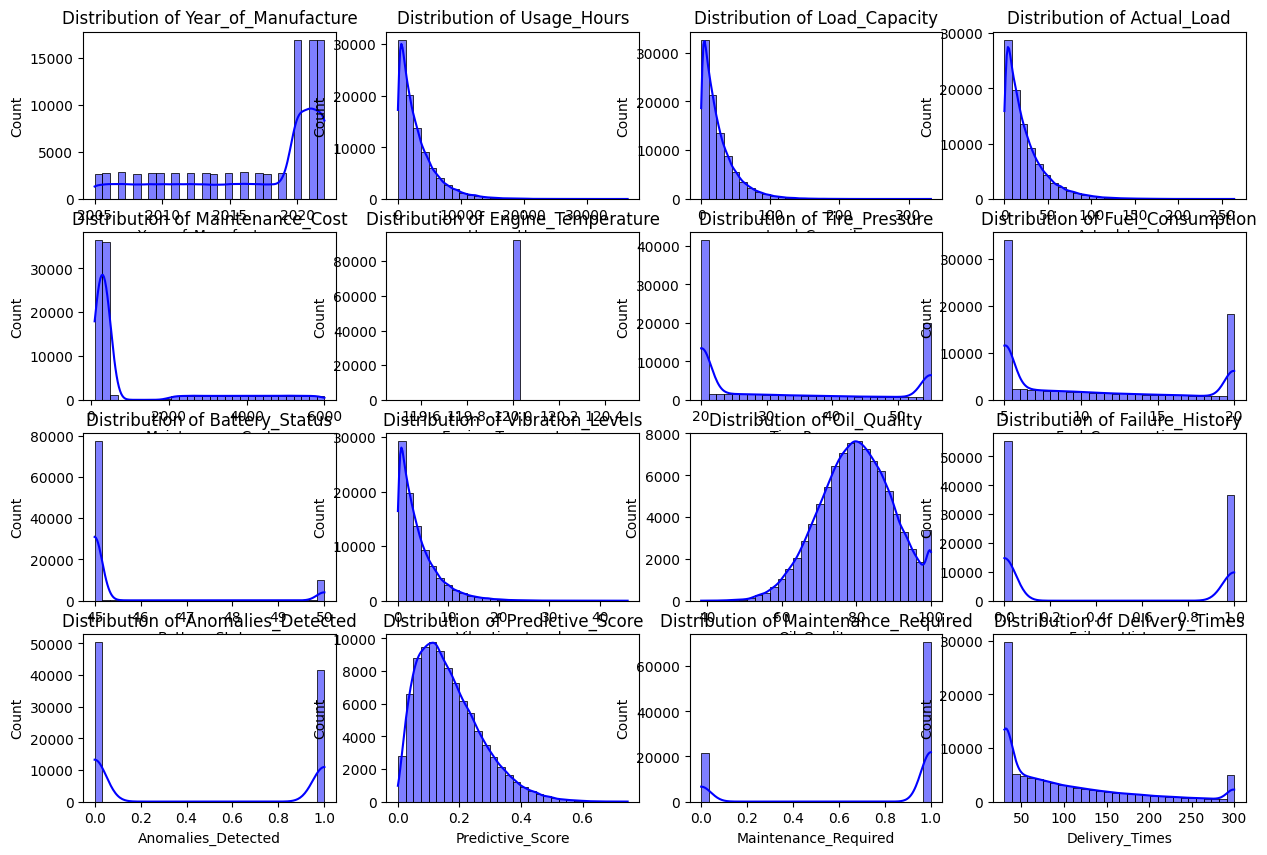

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


# Identify column types
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# 📊 Plot numerical distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)  # Adjust subplot grid as needed
    sns.histplot(df[col], bins=30, kde=True, color='blue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# 📊 Plot categorical distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 4, i)
    sns.countplot(data=df, x=col, palette="coolwarm")
    plt.title(f"Class Distribution: {col}")
    plt.xticks(rotation=45)  # Rotate labels for readability
plt.tight_layout()
plt.show()

In [8]:
df.isna().sum()

Make_and_Model           0
Year_of_Manufacture      0
Vehicle_Type             0
Usage_Hours              0
Route_Info               0
Load_Capacity            0
Actual_Load              0
Last_Maintenance_Date    0
Maintenance_Type         0
Maintenance_Cost         0
Engine_Temperature       0
Tire_Pressure            0
Fuel_Consumption         0
Battery_Status           0
Vibration_Levels         0
Oil_Quality              0
Brake_Condition          0
Failure_History          0
Anomalies_Detected       0
Predictive_Score         0
Maintenance_Required     0
Weather_Conditions       0
Road_Conditions          0
Delivery_Times           0
Downtime_Maintenance     0
Impact_on_Efficiency     0
dtype: int64

In [10]:
df.info()
# Check for duplicates
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92000 entries, 0 to 91999
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make_and_Model         92000 non-null  object 
 1   Year_of_Manufacture    92000 non-null  int64  
 2   Vehicle_Type           92000 non-null  object 
 3   Usage_Hours            92000 non-null  int64  
 4   Route_Info             92000 non-null  object 
 5   Load_Capacity          92000 non-null  float64
 6   Actual_Load            92000 non-null  float64
 7   Last_Maintenance_Date  92000 non-null  object 
 8   Maintenance_Type       92000 non-null  object 
 9   Maintenance_Cost       92000 non-null  float64
 10  Engine_Temperature     92000 non-null  float64
 11  Tire_Pressure          92000 non-null  float64
 12  Fuel_Consumption       92000 non-null  float64
 13  Battery_Status         92000 non-null  float64
 14  Vibration_Levels       92000 non-null  float64
 15  Oi

np.int64(0)

<Axes: xlabel='Maintenance_Required'>

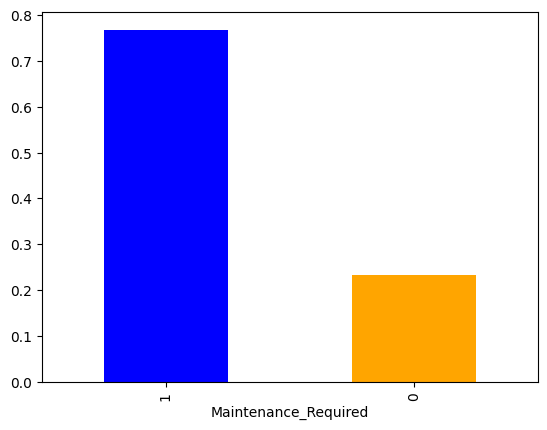

In [11]:
#check target variable distribution
df['Maintenance_Required'].value_counts(normalize=True).plot(kind='bar', color=['blue', 'orange'])

Preprocessor dumped as preprocessor.pkl
PCA model dumped as pca.pkl


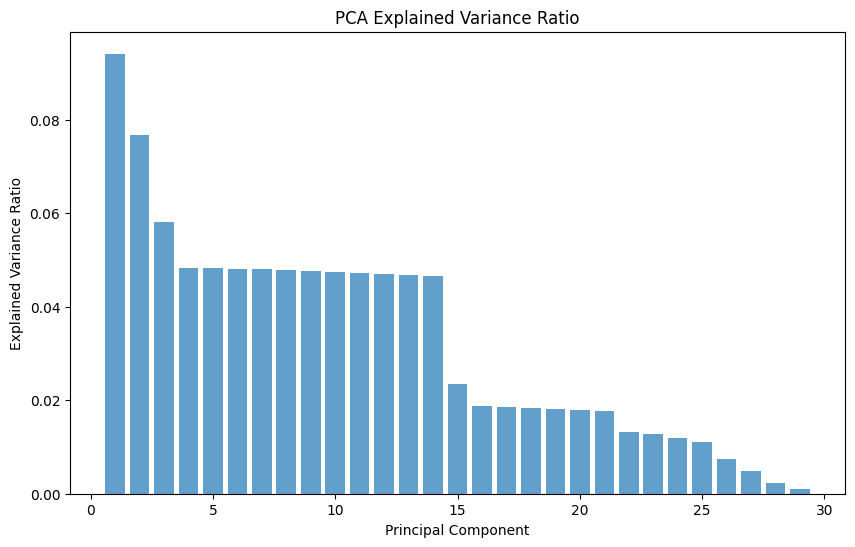

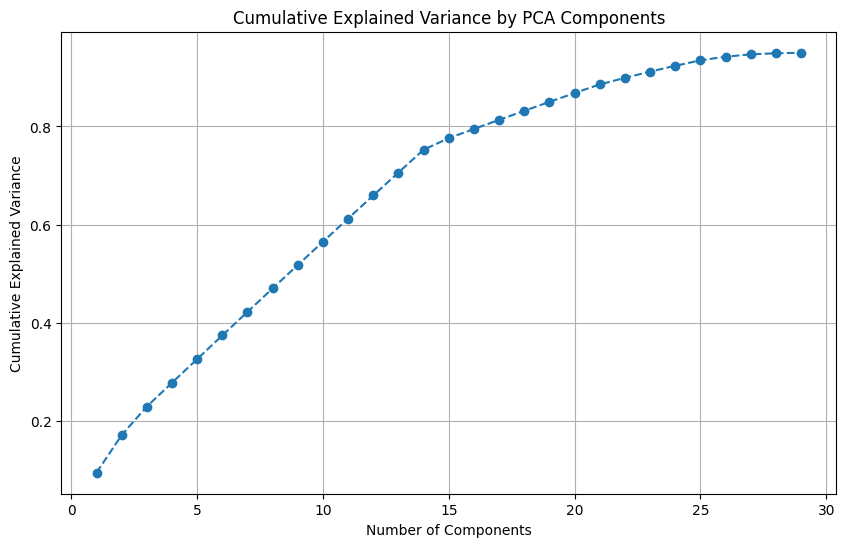

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # for saving the models

# Assume df is your DataFrame and target is "Predictive_Score"
target = 'Maintenance_Required'

# Separate features and target
X = df.drop(columns=[target])
y = df[target]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Train-test split (fitting transformations only on the training set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a ColumnTransformer for scaling numerical features and one hot encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ]
)

# Fit the preprocessor on the training set and transform both train and test sets
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Dump the fitted preprocessor for later deployment
joblib.dump(preprocessor, 'preprocessor.pkl')
print("Preprocessor dumped as preprocessor.pkl")

# Apply PCA for dimensionality reduction, selecting components that explain 95% of the variance
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_processed)
X_test_pca = pca.transform(X_test_processed)

# Dump the fitted PCA model for later deployment
joblib.dump(pca, 'pca.pkl')
print("PCA model dumped as pca.pkl")

# Visualize the explained variance of each principal component
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.title('PCA Explained Variance Ratio')
plt.show()

# Also plot the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()


In [16]:
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
import joblib

# --- Assume the following objects already exist from previous steps ---
# X_train_processed, X_test_processed: Preprocessed (encoded/scaled) data.
# pca: Fitted PCA model.
# Also assume the target variable for classification is "Maintenance_Required"
# and y_train, y_test are defined accordingly.

# Transform the training and test sets using the existing PCA model
X_train_pca = pca.transform(X_train_processed)
X_test_pca = pca.transform(X_test_processed)

# Select the first 16 principal components
X_train_pca_16 = X_train_pca[:, :16]
X_test_pca_16 = X_test_pca[:, :16]

# --- Class Balancing (Oversampling) ---
# The target variable is "Maintenance_Required"
# We perform oversampling on the training set only
ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train_pca_16, y_train)

print("Class distribution after oversampling:", np.bincount(y_train_bal))

# --- Train the XGBoost Classifier ---
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train_bal, y_train_bal)

# --- Predictions on Training and Test Sets ---
y_train_pred = xgb_clf.predict(X_train_bal)
y_test_pred = xgb_clf.predict(X_test_pca_16)

# --- Performance Evaluation ---
print("\nTraining Classification Report:")
print(classification_report(y_train_bal, y_train_pred))

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix on Test Set:")
print(confusion_matrix(y_test, y_test_pred))

# --- Cross-Validation ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb_clf, X_train_bal, y_train_bal, cv=cv, scoring='accuracy')
print("\nCross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Class distribution after oversampling: [56566 56566]

Training Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     56566
           1       1.00      0.99      0.99     56566

    accuracy                           0.99    113132
   macro avg       0.99      0.99      0.99    113132
weighted avg       0.99      0.99      0.99    113132

Test Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      4311
           1       0.99      0.97      0.98     14089

    accuracy                           0.97     18400
   macro avg       0.95      0.97      0.96     18400
weighted avg       0.97      0.97      0.97     18400

Confusion Matrix on Test Set:
[[ 4203   108]
 [  476 13613]]

Cross-Validation Accuracy Scores: [0.98006806 0.98183586 0.98201184 0.98090692 0.98006718]
Mean CV Accuracy: 0.9809779730936082


In [17]:
# Save the trained model
joblib.dump(xgb_clf, 'xgb_classifier_pca.joblib')

['xgb_classifier_pca.joblib']

In [1]:
X_train_pca.dtypes

NameError: name 'X_train_pca' is not defined